In [1]:
# This installs the ability to import jupyter notebooks
import sys

!{sys.executable} -m pip install import_ipynb

In [ ]:
import import_ipynb
from util import *

# Read a CSV
calendar = read_csv('../data/calendar.csv')

calendar.head()

In [8]:
print(calendar['listing_id'].isnull().values.any())
print(calendar['date'].isnull().values.any())
print(calendar['available'].isnull().values.any())

False
False
False


In [9]:
print(min(calendar['date']))
print(max(calendar['date']))

2016-01-04
2017-01-02


Mem. usage decreased to 37.21 Mb (12.5% reduction)
Data collected for 2016-02-01 00:00:00
Data collected for 2016-03-01 00:00:00
Data collected for 2016-04-01 00:00:00
Data collected for 2016-05-01 00:00:00
Data collected for 2016-06-01 00:00:00
Data collected for 2016-07-01 00:00:00
Data collected for 2016-08-01 00:00:00
Data collected for 2016-09-01 00:00:00
Data collected for 2016-10-01 00:00:00
Data collected for 2016-11-01 00:00:00
Data collected for 2016-12-01 00:00:00
Data collected for 2017-01-01 00:00:00


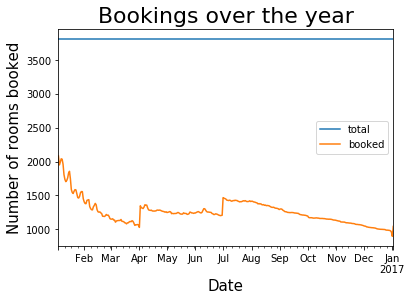

In [4]:
import import_ipynb
from util import *
from datetime import timedelta

# This is what we want to populate and plot
listing_data = pd.DataFrame(columns=['date', 'total', 'booked'])

calendar = pd.read_csv('../data/calendar.csv', parse_dates=['date']).pipe(reduce_mem_usage)

# These are the min and max dates in calendar (worked out earlier)
current_date = min(calendar['date'])
end_date = max(calendar['date'])

while current_date <= end_date:

    todays_listings = calendar[calendar['date'] == current_date]

    total = row_count(todays_listings)
    booked = row_count(todays_listings[todays_listings['available'] == 'f'])

    listing_data = listing_data.append({'date': current_date, 'total': total, 'booked': booked}, ignore_index = True)

    if(current_date.day == 1):
        print('Data collected for ' + str(current_date))

    current_date = current_date + timedelta(days=1)

standardize_plot_fonts()

plot = listing_data.plot(x='date')
plot.set_xlabel('Date')
plot.set_ylabel('Number of rooms booked')
plot.set_title('Bookings over the year')

plt.show()